In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the Dataset

In [ ]:
# Load the datasets
train_data = pd.read_csv('/content/drive/MyDrive/archive (4)/fraudTrain.csv')
test_data = pd.read_csv('/content/drive/MyDrive/archive (4)/fraudTest.csv')

# Preprocess the Dataset

In [ ]:
# Concatenate the training and test datasets for preprocessing
df = pd.concat([train_data, test_data])
print(df.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

<Axes: xlabel='is_fraud'>

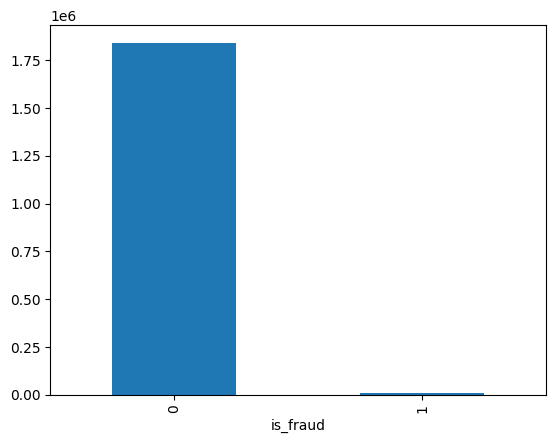

In [ ]:
df.groupby("is_fraud").count()["cc_num"].plot(kind = "bar")

In [ ]:
#'is_fraud' is a column indicating whether a transaction is fraudulent (1) or not (0).

fraud = df[df["is_fraud"] == 1]
not_fraud = df[df["is_fraud"] == 0]

print("Number of fraudulent transactions:", fraud.shape[0])
print("Number of legitimate transactions:", not_fraud.shape[0])

Number of fraudulent transactions: 9651
Number of legitimate transactions: 1842743


In [ ]:
not_fraud = not_fraud.sample(fraud.shape[0], random_state=42)

In [ ]:
df_new = pd.concat([fraud, not_fraud])

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 2449 to 135673
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19302 non-null  int64  
 1   trans_date_trans_time  19302 non-null  object 
 2   cc_num                 19302 non-null  int64  
 3   merchant               19302 non-null  object 
 4   category               19302 non-null  object 
 5   amt                    19302 non-null  float64
 6   first                  19302 non-null  object 
 7   last                   19302 non-null  object 
 8   gender                 19302 non-null  object 
 9   street                 19302 non-null  object 
 10  city                   19302 non-null  object 
 11  state                  19302 non-null  object 
 12  zip                    19302 non-null  int64  
 13  lat                    19302 non-null  float64
 14  long                   19302 non-null  float64
 15  cit

<Axes: xlabel='is_fraud'>

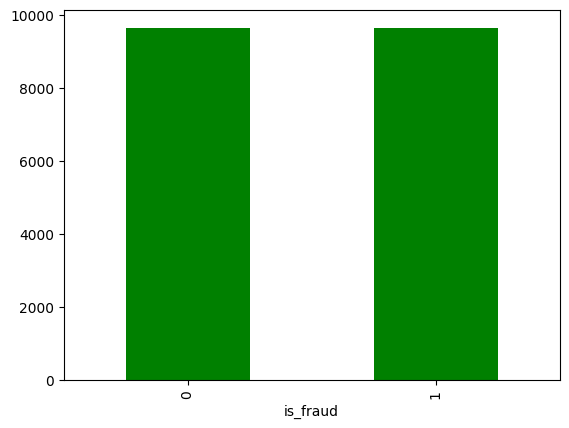

In [ ]:
df_new.groupby("is_fraud").count()['cc_num'].plot(kind = "bar" , color='green')

In [ ]:
# drop unnecessary columns
df_new .drop(columns=['Unnamed: 0','merchant', 'cc_num','first', 'last','gender','trans_num','unix_time','street','merch_lat','merch_long','job','zip'], inplace= True)
df_new.head()

,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1


In [ ]:
df_new.duplicated().sum()

2

In [ ]:
df_new.drop_duplicates()

,category,amt,city,state,lat,long,city_pop,dob,is_fraud
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1988-09-15,1
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1960-10-28,1
...,...,...,...,...,...,...,...,...,...
99709,gas_transport,62.58,Johns Island,SC,32.8357,-79.8217,20478,1997-06-04,0
274694,misc_net,273.25,Belfast,NY,42.3200,-78.0943,1766,1962-06-04,0
807093,misc_pos,2.74,Greendale,WI,42.9373,-87.9943,13973,1981-05-06,0
861157,shopping_net,161.28,Westport,KY,38.4921,-85.4524,564,1996-04-10,0


# Techniques to improve the performance of models along with model building.

In [ ]:
df_new["dob"] = pd.to_datetime(df_new["dob"])

In [ ]:
import datetime
from datetime import datetime
df_new["age"] = datetime.now().year - df_new["dob"].dt.year
df_new.drop(columns=["dob"], inplace=True)

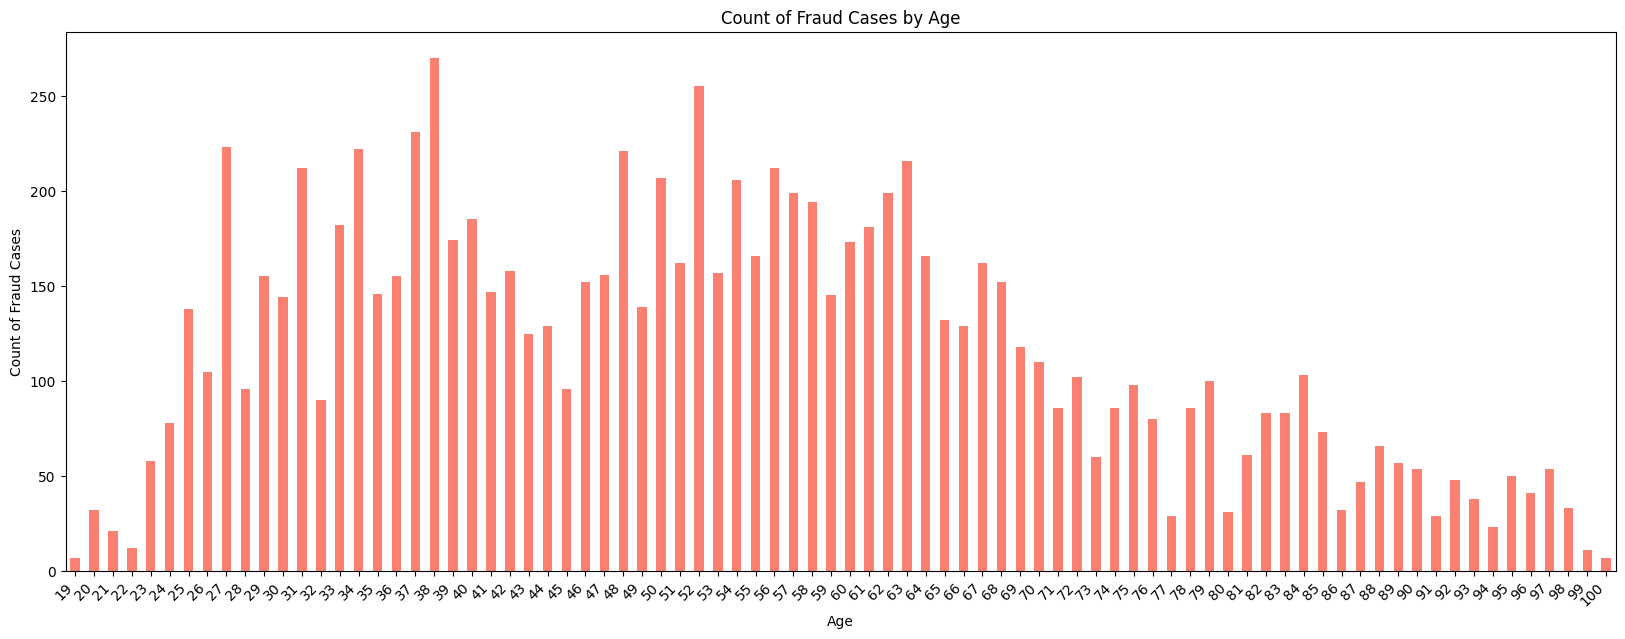

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))
ax = df_new[df_new['is_fraud'] == 1].groupby('age').size().plot(kind='bar', color='salmon')
ax.set_xlabel('Age')
ax.set_ylabel('Count of Fraud Cases')
ax.set_title('Count of Fraud Cases by Age')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
numeric_columns = df_new.select_dtypes(include=['int64', 'int32', 'float64']).columns.tolist()
categorical_columns = df_new.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns:")
print(numeric_columns)
print("\nCategorical Columns:")
print(categorical_columns)

Numeric Columns:
['amt', 'lat', 'long', 'city_pop', 'is_fraud', 'age']

Categorical Columns:
['category', 'city', 'state']


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df_new.drop('is_fraud', axis=1)
y = df_new['is_fraud']

numeric_features = X.select_dtypes(include=['int64', 'int32', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
df_new.head()

,category,amt,city,state,lat,long,city_pop,is_fraud,age
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,1,36
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,1,64
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,1,64
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,1,36
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,1,64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
def evaluate_model(classifiers, X_train, y_train, X_test, y_test):
    classifiers.fit(X_train, y_train)
    y_pred = classifiers.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [ ]:
# Evaluate each model
results = {}
for name, clf in classifiers.items():
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Create a DataFrame to display the results
results_df = pd.DataFrame(results).T
print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.832326   0.873737  0.776857  0.822454
Random Forest        0.941806   0.962066  0.919862  0.940491
SVC                  0.867726   0.966272  0.762003  0.852066
Gradient Boosting    0.948368   0.952896  0.943351  0.948099
KNN                  0.823001   0.855513  0.777202  0.814480


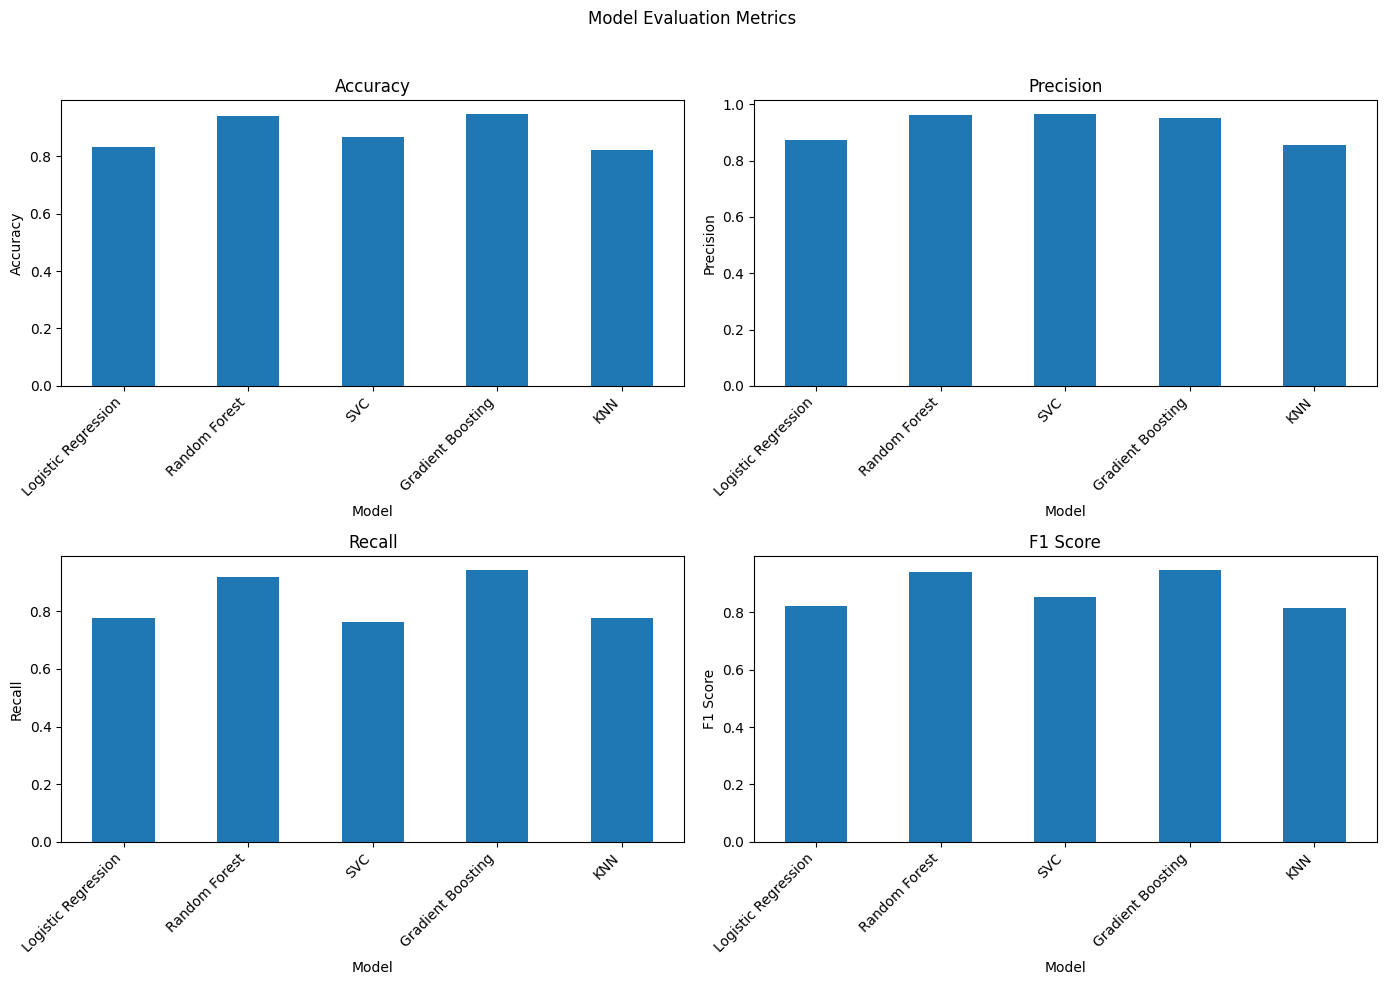

In [ ]:
# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Evaluation Metrics')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    results_df[metric].plot(kind='bar', ax=ax)
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    ax.set_xticklabels(results_df.index, rotation=45, ha='right')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Confusion Matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('True vs Predicted matrix')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


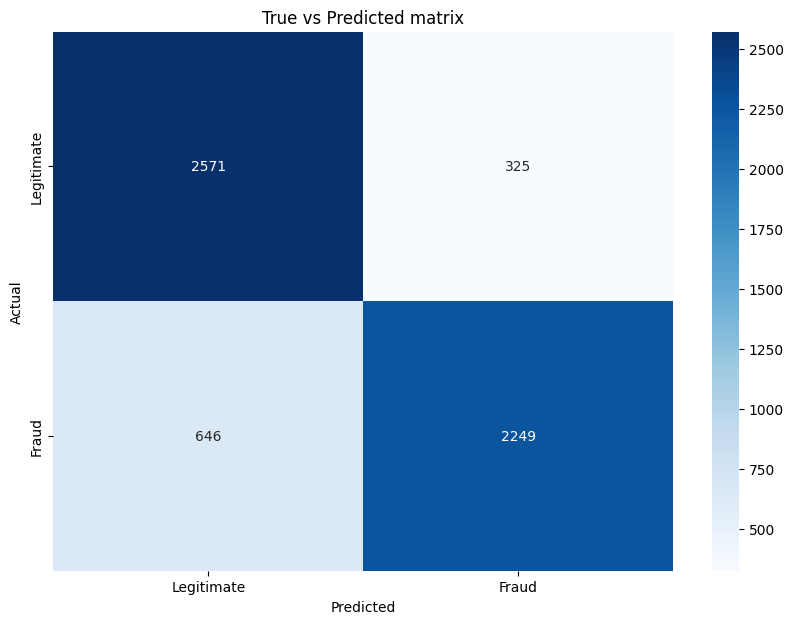

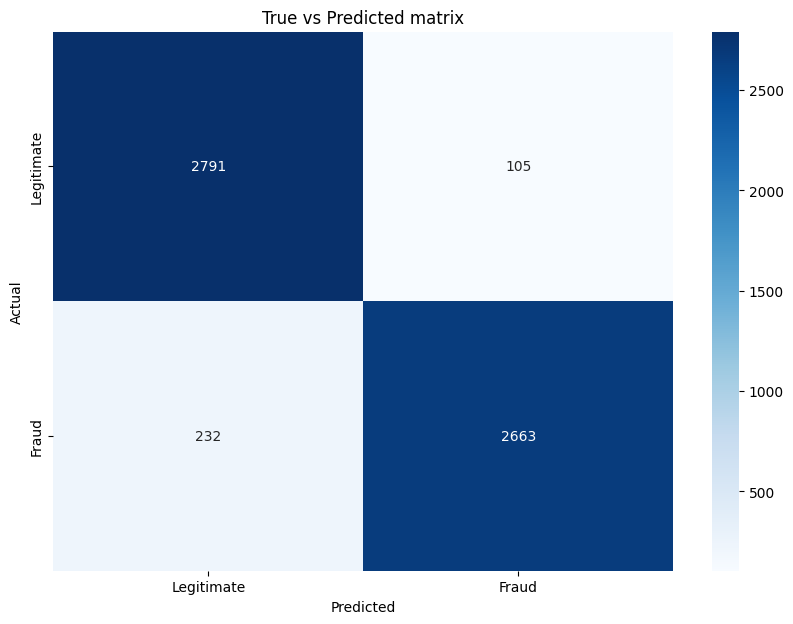

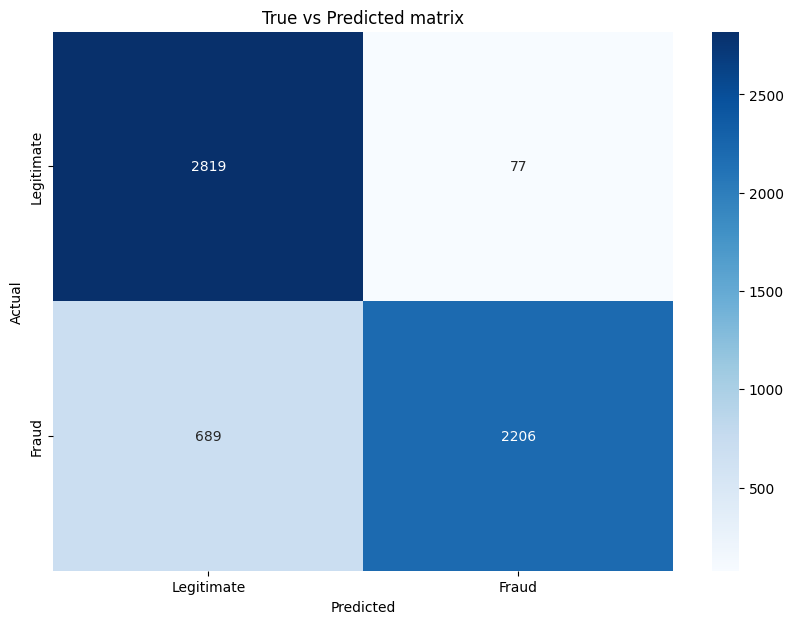

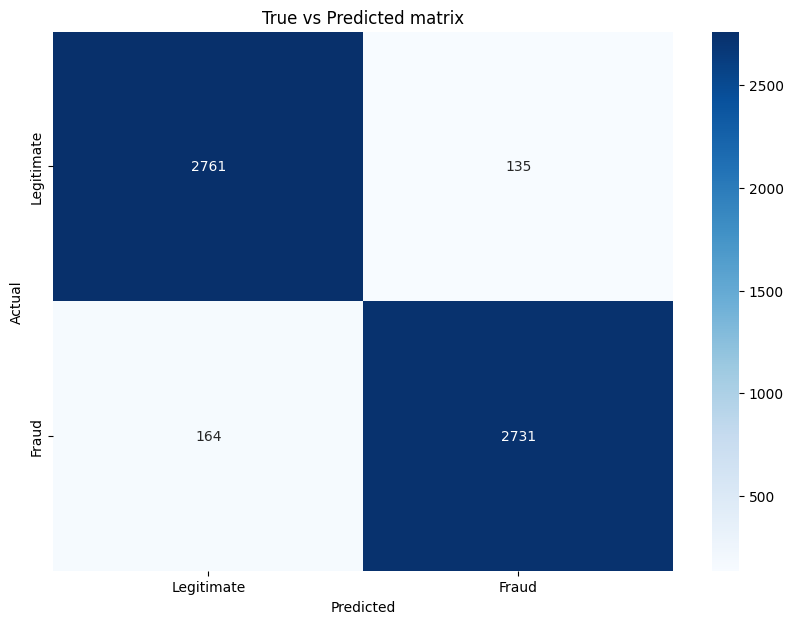

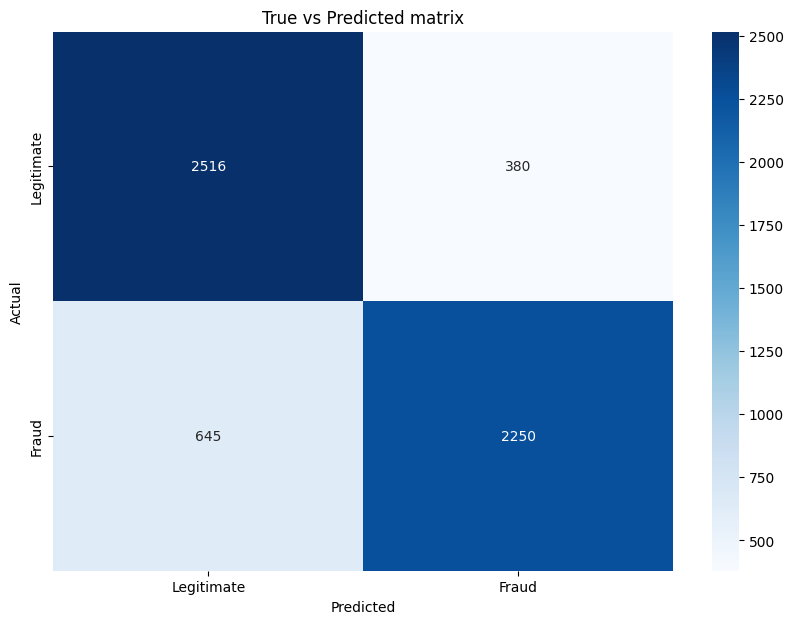

In [ ]:
import seaborn as sns
for name, clf in classifiers.items():
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    model.fit(X_train, y_train) # Train the model
    y_pred = model.predict(X_test) # Generate predictions
    plot_confusion_matrix(y_test, y_pred) # Pass true and predicted labels